Conceptos básicos de visualización de datos en Matplotlib
===

Este tutorial esta basado en https://matplotlib.org/stable/tutorials/introductory/quick_start.html

Ejemplo básico
----

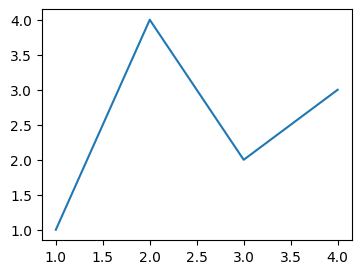

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(4, 3))  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the axes.
plt.show()

Partes de una figura
---

![anatomy.png](assets/anatomy.png)

Figure
---

In [2]:
#
# Creación de nuevas figuras con pyplot
#

# an empty figure with no Axes
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

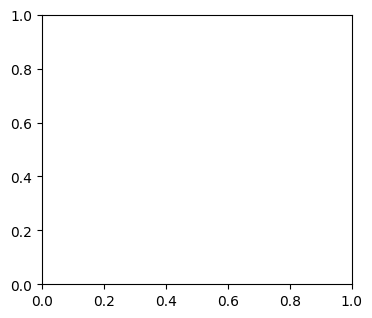

In [3]:
# a figure with a single Axes
fig, ax = plt.subplots(figsize=(4, 3.5))

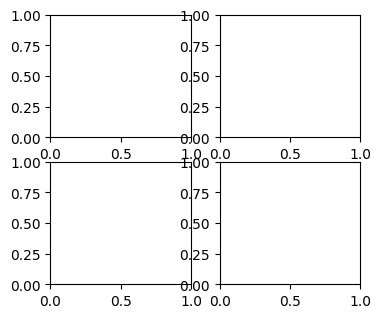

In [4]:
# a figure with a 2x2 grid of Axes
fig, axs = plt.subplots(2, 2, figsize=(4, 3.5))

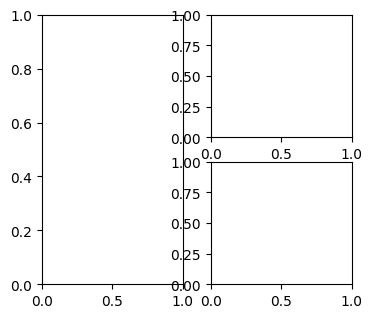

In [5]:
# a figure with one axes on the left, and two on the right:
fig, axs = plt.subplot_mosaic(
    [["left", "right-top"], ["left", "right_bottom"]], figsize=(4, 3.5)
)

Tipos de entradas para funciones de graficación
---

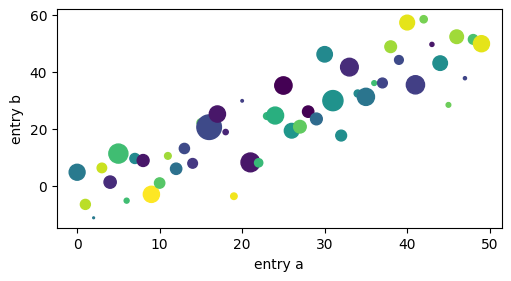

In [6]:
np.random.seed(19680801)  # seed the random number generator.
data = {"a": np.arange(50), "c": np.random.randint(0, 50, 50), "d": np.random.randn(50)}
data["b"] = data["a"] + 10 * np.random.randn(50)
data["d"] = np.abs(data["d"]) * 100

fig, ax = plt.subplots(figsize=(5, 2.7), layout="constrained")
ax.scatter("a", "b", c="c", s="d", data=data)
ax.set_xlabel("entry a")
ax.set_ylabel("entry b")
plt.show()

Estilos de codificación
-----

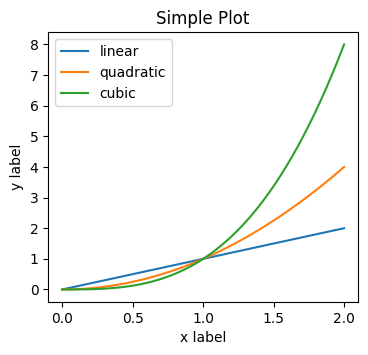

In [7]:
# ------------------------------------------------------------
# Estilo orientado a objetos
# ------------------------------------------------------------

#
# Datos del eje X
#
x = np.linspace(0, 2, 100)

#
# Crea una figura y un eje para graficar
#
fig, ax = plt.subplots(figsize=(4, 3.5))

#
# Construye cada line plot y especifica la legenda
#
ax.plot(x, x, label="linear")
ax.plot(x, x**2, label="quadratic")
ax.plot(x, x**3, label="cubic")

#
# Titulos
#
ax.set_xlabel("x label")
ax.set_ylabel("y label")
ax.set_title("Simple Plot")

#
# Hace visible la legenda
#
ax.legend()

plt.show()

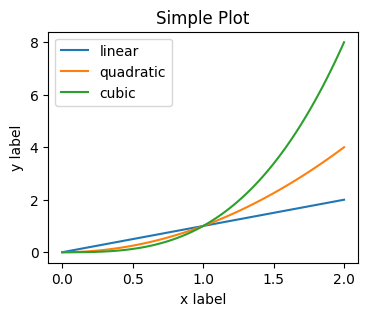

In [8]:
# ------------------------------------------------------------
# Estilo pyplot
# ------------------------------------------------------------

#
# La figura se crea al llamar a plt.plot()
# Construye cada line plot y especifica la legenda
#
plt.figure(figsize=(4, 3))
plt.plot(x, x, label="linear")
plt.plot(x, x**2, label="quadratic")
plt.plot(x, x**3, label="cubic")

#
# Titulos
#
plt.xlabel("x label")
plt.ylabel("y label")
plt.title("Simple Plot")

#
# Hace visible la legenda
#
plt.legend()

plt.show()

Creación de funciones (método recomendado por Matplotlib)
---

In [9]:
#
# Esqueleto de la función
#
def my_plotter(ax, data1, data2, param_dict):
    #
    # Código del usuario aquí
    #
    out = ax.plot(data1, data2, **param_dict)
    return out

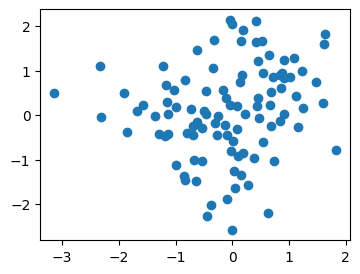

In [10]:
#
# Ejemplo de Uso 1
#
data1, data2, data3, data4 = np.random.randn(4, 100)
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
my_plotter(ax, data1, data2, {"marker": "o", "linestyle": ""})
plt.show()

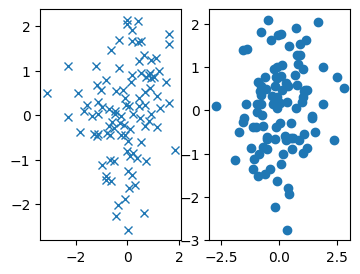

In [11]:
#
# Ejemplo de Uso 2
#
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4, 3))
my_plotter(ax1, data1, data2, {"marker": "x", "linestyle": ""})
my_plotter(ax2, data3, data4, {"marker": "o", "linestyle": ""})
plt.show()

Artist
----

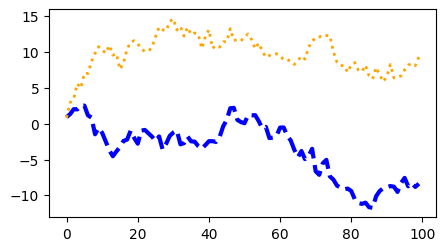

In [12]:
#
# En el siguiente ejemplo se establecen algunas propiedades manualmente
#
fig, ax = plt.subplots(figsize=(5, 2.7))
x = np.arange(len(data1))
ax.plot(x, np.cumsum(data1), color="blue", linewidth=3, linestyle="--")
(l,) = ax.plot(x, np.cumsum(data2), color="orange", linewidth=2)
l.set_linestyle(":")

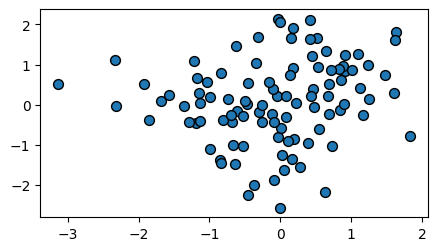

In [13]:
#
# Algunas propiedades admiten varios colores
#
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.scatter(data1, data2, s=50, facecolor="C0", edgecolor="k")

Linewidth, linestyle y markersize
----

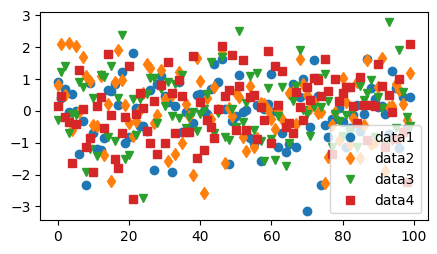

In [14]:
#
# Las lineas son especificadas en puntos tipograficos (1 pt = 1/72 in).
# Las unidades del tamaño del marcador dependen del método usado:
# * plot() usa puntos
# * scatter() especifica el tamaño proporcional al area de visualización
#
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(data1, "o", label="data1")
ax.plot(data2, "d", label="data2")
ax.plot(data3, "v", label="data3")
ax.plot(data4, "s", label="data4")
ax.legend()

Etiquetas
----

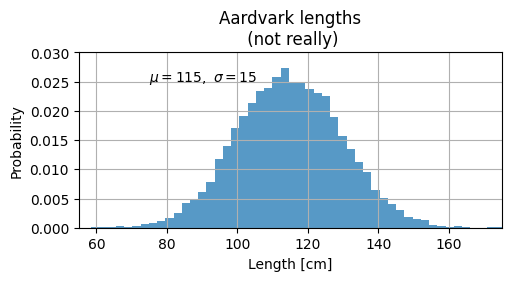

In [15]:
mu, sigma = 115, 15

x = mu + sigma * np.random.randn(10000)
fig, ax = plt.subplots(figsize=(5, 2.7), layout="constrained")

n, bins, patches = ax.hist(x, 50, density=True, facecolor="C0", alpha=0.75)

#
# Se usa set_* para especificar los textos
#
ax.set_xlabel("Length [cm]")
ax.set_ylabel("Probability")
ax.set_title("Aardvark lengths\n (not really)")

# Uso de expresiones matemáticas
ax.text(75, 0.025, r"$\mu=115,\ \sigma=15$")

ax.axis([55, 175, 0, 0.03])
ax.grid(True)

(-2.0, 2.0)

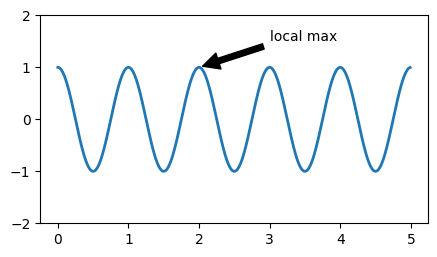

In [16]:
#
# Anotaciones
#
fig, ax = plt.subplots(figsize=(5, 2.7))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
(line,) = ax.plot(t, s, lw=2)

ax.annotate(
    "local max",
    xy=(2, 1),
    xytext=(3, 1.5),
    arrowprops=dict(facecolor="black", shrink=0.05),
)

ax.set_ylim(-2, 2)

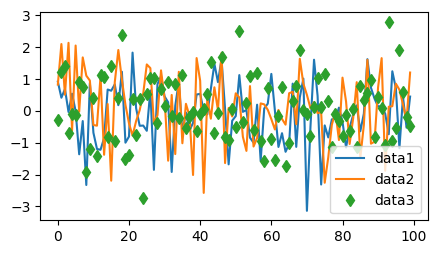

In [17]:
#
# Legendas
#
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(np.arange(len(data1)), data1, label="data1")
ax.plot(np.arange(len(data2)), data2, label="data2")
ax.plot(np.arange(len(data3)), data3, "d", label="data3")
ax.legend()

Escala de los ejes y marcadores
----

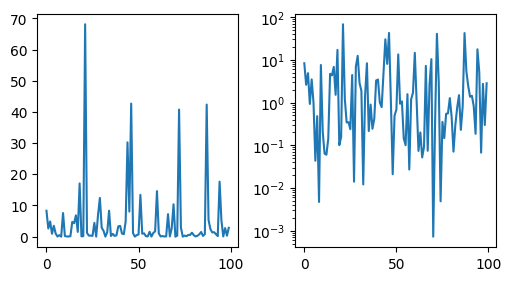

In [18]:
#
# Escalas
#
fig, axs = plt.subplots(1, 2, figsize=(5, 2.7), layout="constrained")
xdata = np.arange(len(data1))
data = 10**data1
axs[0].plot(xdata, data)

axs[1].set_yscale("log")
axs[1].plot(xdata, data)

Text(0.5, 1.0, 'Manual ticks')

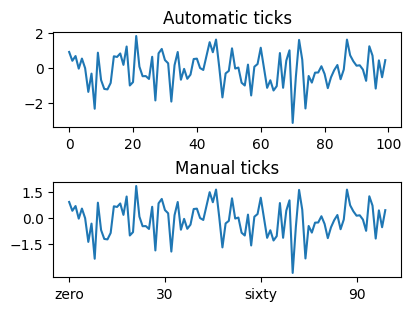

In [19]:
#
# Tick locators & formatters
#
fig, axs = plt.subplots(2, 1, layout="constrained", figsize=(4, 3))

axs[0].plot(xdata, data1)
axs[0].set_title("Automatic ticks")

axs[1].plot(xdata, data1)
axs[1].set_xticks(np.arange(0, 100, 30), ["zero", "30", "sixty", "90"])
axs[1].set_yticks([-1.5, 0, 1.5])
axs[1].set_title("Manual ticks")

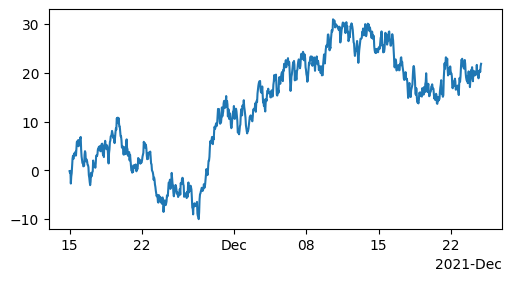

In [20]:
#
# Graficación con fechas y cadenas de texto
#
fig, ax = plt.subplots(figsize=(5, 2.7), layout="constrained")
dates = np.arange(
    np.datetime64("2021-11-15"), np.datetime64("2021-12-25"), np.timedelta64(1, "h")
)
data = np.cumsum(np.random.randn(len(dates)))
ax.plot(dates, data)
cdf = mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator())
ax.xaxis.set_major_formatter(cdf)

<BarContainer object of 4 artists>

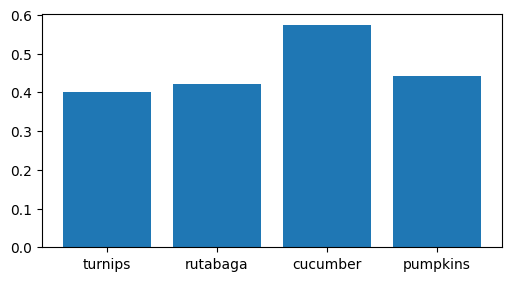

In [21]:
#
# Graficación de datos categóricos
#
fig, ax = plt.subplots(figsize=(5, 2.7), layout="constrained")
categories = ["turnips", "rutabaga", "cucumber", "pumpkins"]

ax.bar(categories, np.random.rand(len(categories)))

Text(0.5, 0, 'Angle [°]')

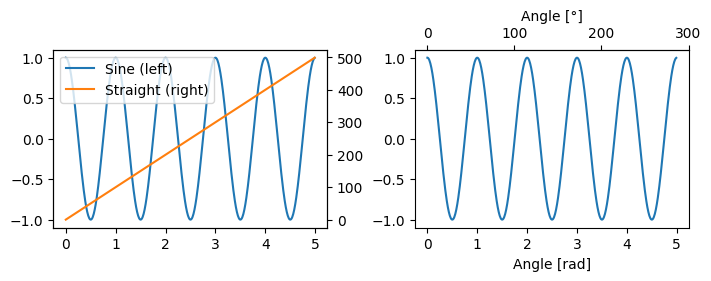

In [22]:
#
# Objetos adicionales
#
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(7, 2.7), layout="constrained")
(l1,) = ax1.plot(t, s)
ax2 = ax1.twinx()
(l2,) = ax2.plot(t, range(len(t)), "C1")
ax2.legend([l1, l2], ["Sine (left)", "Straight (right)"])

ax3.plot(t, s)
ax3.set_xlabel("Angle [rad]")
ax4 = ax3.secondary_xaxis("top", functions=(np.rad2deg, np.deg2rad))
ax4.set_xlabel("Angle [°]")

Mapas de colores
----

Text(0.5, 1.0, 'scatter()')

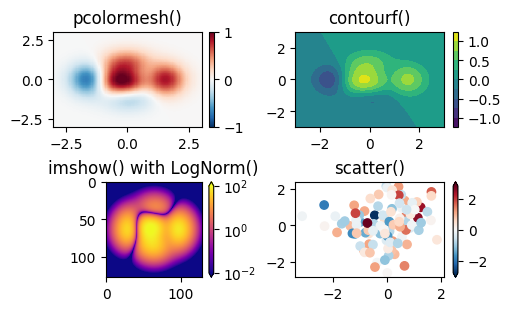

In [23]:
X, Y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))
Z = (1 - X / 2 + X**5 + Y**3) * np.exp(-(X**2) - Y**2)

fig, axs = plt.subplots(2, 2, layout="constrained", figsize=(5, 3))
pc = axs[0, 0].pcolormesh(X, Y, Z, vmin=-1, vmax=1, cmap="RdBu_r")
fig.colorbar(pc, ax=axs[0, 0])
axs[0, 0].set_title("pcolormesh()")

co = axs[0, 1].contourf(X, Y, Z, levels=np.linspace(-1.25, 1.25, 11))
fig.colorbar(co, ax=axs[0, 1])
axs[0, 1].set_title("contourf()")

pc = axs[1, 0].imshow(
    Z**2 * 100, cmap="plasma", norm=mpl.colors.LogNorm(vmin=0.01, vmax=100)
)
fig.colorbar(pc, ax=axs[1, 0], extend="both")
axs[1, 0].set_title("imshow() with LogNorm()")

pc = axs[1, 1].scatter(data1, data2, c=data3, cmap="RdBu_r")
fig.colorbar(pc, ax=axs[1, 1], extend="both")
axs[1, 1].set_title("scatter()")

Trabajo con varias figuras y ejes
---

Text(0.5, 1.0, 'right')

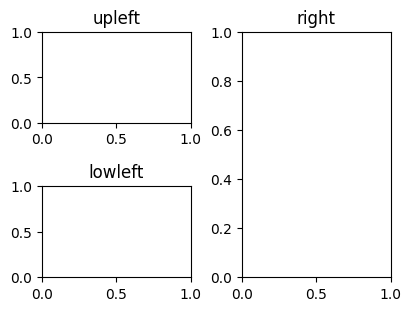

In [24]:
fig, axd = plt.subplot_mosaic(
    [["upleft", "right"], ["lowleft", "right"]], layout="constrained", figsize=(4, 3)
)
axd["upleft"].set_title("upleft")
axd["lowleft"].set_title("lowleft")
axd["right"].set_title("right")